# The Ratio: Analysis and Prediction of Twitter's replies-to-retweets ratio



Group: Giovanna Lemos Ribeiro, Isabel Cachola, Kevin He, Olga Karaiman

## <b> Outline and Deliverables </b>
Our motivation is to build a machine learning model that can predict a tweets replies to retweets ratio based on the tweet textual data and user information. For our predictive model we will use the tweets’ content and use sentiment analysis to analyze the text

### Completed Deliverables
1. <u>Must Have #1:</u> Using Twitter API, create a dataset and features to be used in the model. Pre-process the data

2. <u>Must Have #2:</u> Use a pretrained sentiment prediction model to calculate the if tweet has more replies or retweets

3. <u>Must Have #3:</u> Create a logistic regression, Bi-LSTM and regular feed-forward NN model, to predict if tweet has more replies or retweets

4. <u>Nice To Have #2:</u> Implement feature engineering techniques, such as eliminating constant or highly correlated features

5. <u>Nice To Have #3:</u> Make an analysis on the model explainability

6. <u>Would Like #1:</u> Come up with the new applications for this model and discuss it in the final project

### Additional Deliverables
1. Create methodologies to balance the data and test the models on the balanced data

2. Test other models such as SVM and Majority Vote

### Uncompleted Deliverables

1. <u>Would Like #2:</u> Create an API to allow other people to use the model -- We ran out of time

2. <u>Would Like #3:</u> Conduct an analysis of the relationship between user clusters on Twitter and the number of negative replies. The hypothesis is that users who have more cluster overlap receive more negative replies -- It is hard to track the replies to each tweet using the twitter API (specially considering our quota limit), and we would not be able to complete this on time. Moreover, that deviated a bit from the central goal of the project

3. <u>Nice to Have #1:</u> Use more modern neural architectures, like transformers, to make the prediction - We have opted to use other methods we thought would work better, such as majority vote


## <b> Preliminaries </b>

### Problem
<u> Problem Summary:</u> The objective of the project is predict if tweet has more replies than retweets (ratioed). Therefore, this is a supervised learning classification problem. <br>

<u>Real-Word Applications:</u> In Twitter, there is a very interesting phenomena known as "The Ratio". While in some social medias, such as Instagram, a big engagement such as likes, comments, shares indicate that people enjoy the content, we can usually observe something different on twitter. On this platform, if a post receives more replies than retweets or likes, it might be an indication the post generates controversy. According to a meta-analysis [1] of 100 academic research papers about Twitter, retweeting tends to indicate “a level of endorsement of the message and/or the originator.”
The ratio between retweets and replies is useful in **identifying misinformation and hateful speech**. On social media, there is the instant accountability of users who respond to a tweet in the form of replies to controversial topics. Many times, these tweets with low ratios of retweets to replies are filled with bigotry, lies and “attempts to bully the week [2]”. In addition, it can also help individuals and companies learn how to message better. Companies and individuals can learn and reconsider how to engage their audiences.

Another very important real-world application of our classification model is **a potentially novel approach to label unlabeled tweets**. Classifying tweets using supervised algorithms is mostly based on the labelled dataset of Twitter. To label the datasets manually is costly, time-consuming and a challenging task. There are also Twitter data publishing policies that make old labelled Twitter datasets not available. So, even using old data can be impossible nowadats. We think that we can use our model as a proxy to controversy classification, without requiring human annotation.

However, one bias of our model is that we have only trained the model in English tweets. Users must be aware of this fact when using the model and only use it for prediction on English text.


Resources:

1.   http://cs.wellesley.edu/~pmetaxas/WorkingPapers/Retweet-meaning.pdf
2.   Mounk, Y. (2019, October 21). Only Cowards Don't Get Ratioed. Retrieved December 13, 2020, from https://www.theatlantic.com/ideas/archive/2019/10/ratio-twitter-good/600334/






### Dataset
We have used twitter API for the dataset. This data contais all the features we need, is very suitable for our task, and can be obtained for free. <br>
Our data is composed by 18,000 examples, which are divided as 60% for training, 20% for test, and 20% for evaluation. 




#### Importing libraries
Always run this section just before starting the notebook. You should run pip install in case those libraries are not in your colab yet

In [1]:
# only run if you do not have the library yet
!pip install lime

     |████████████████████████████████| 276kB 12.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=f4e2a3a585197ef6559cc1d821be64a47307eabb2174fd9ebb41129a6dee2e3e
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [4]:
## Importing the libraries we will use
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import lime.lime_tabular
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import math
import seaborn as sn
from imblearn.over_sampling import SMOTE
from collections import Counter
import requests
import pickle
%matplotlib inline

## Data Analysis and Preprocessing

#### How to obtain data <br>
The data is obtained running the scripts in the github repo. The scripts allow you to obtain data from the twitter API, process the features, divide into train-test-dev splits, remove constant features, adn balance the train data using SMOTE.
<br><br>

#### Data Preprocessing Steps <br>
To obtain the final data, we have: 
1. Made calls to the twitter API to obtain twitter data
2. Used the twitter's author id obtained in the previous step and use it in a twitter's user API call to obtain the number of followers of the author
4. Calculating the number of mentions in text and storing it as a separate feature
3. Processed the twitter's text by eliminating invalid characters, hashtags, mentions, and nonwords
4. Obtained the sentiment score of the pre-processed twitter text
5. Calculated the tfidf of the twitter text
6. Calculated the tfidf of the hashtags used
7. Normalization of features
8. Used BERT for word embeddings
<br><br>

#### Features Used <br>
We wanted to use features that contain some metrics about the engagement of the tweets, and also provides some information about the text. Therefore, we have chosen the following features:
- Like count: the number of likes
- quote_count: the number of quotations
- mentions_count: the number of mentions
- sentiment_score_comp: the composite sentiment score of the tweet
- sentiment_score_pos: the positive sentiment score of the tweet
- sentiment_score_neg: the negative sentiment score of the tweet
- sentiment_score_neu: the neutral sentiment score of the tweet
- author_followers: the number of author followers
- text_tfidf_sum: the sum of the tfidf of all words of the tweet
- text_tfidf_max: the max tfidf of all words of the tweet
- text_tfidf_min: the min tfidf of all words of the tweet
- text_tfidf_avg: the average tfidf of all words of the tweet
- text_tfidf_std: the standart deviation of the tfidf of all words of the tweet
- hashtag_tfidf_sum: the sum of the tfidf of all hashtags of the tweet
- hashtag_tfidf_max: the max tfidf of all hashtags of the tweet
- text_tfidf_min: the min tfidf of all hashtags of the tweet
- hashtag_tfidf_avg: the average tfidf of all hashtags of the tweet
- hashtag_tfidf_std: the standart deviation of the tfidf of all hashtags of the tweet

Moreover, we have vectorized the text using BERT and used it as features. 

For the label, we have: <br>
- label = 1 if reply_count > retweet_count <br>
- label = 0 if reply_count < retweet_count <br>

The only features that could be empty would be the ones related to the text (sentiment scores and text tfidf) in case it is empty, and hashtags (tfidf), in case there are none. In those cases, those features will be equal to 0
<br><br>

#### Types of data <br>
We will have two types of data:
 - Numeric data: does not contain word embedding features
 - Complete data: constains word embedding features

Although the complete data has more information, training the models with the numeric data allows for better model explainability. <br>


# Data visualization

**Word Clouds of tweets text**

Word Clouds for tweets with more replies and for tweets with more retweets.

Common language:

*For tweets with more replies:*

**Positive**: Love, girl, guy,god, fan, live, pretty, honesty, birthday, congrats

**Controversial**: shut, hell, hate, f**, shut, covid, vaccine, US, UK, government, exuse

*For tweets with more retweets:*

**Positive**: Respect, show, goal, artist, youth, win, love, million,help, prize, angel, heart, support, home

**Controversial**: Trump, Army, f*,die, muslim, power, hate

As we can see from a small selection above, tweets with more replies have more cotroversial terms used

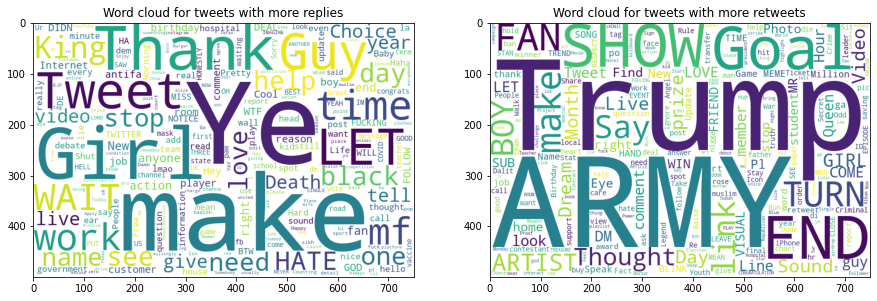

In [8]:
#the code implementation for wordclouds was made outside of this nodebook. 
#The code is avaiable on github
img = mpimg.imread('./wordcloud.png')
img1 = mpimg.imread('./wordcloud1.png')


f,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(img)
ax[0].title.set_text('Word cloud for tweets with more replies')
ax[1].imshow(img1)
ax[1].title.set_text('Word cloud for tweets with more retweets')
plt.show() 

#### Vizualizing Features

In [ ]:
## ----- Set the path to load the data ----- ## 
train_path = "./train.csv" # Insert path to train data
test_path = "./test.csv" # Insert path to test data
dev_path = "./dev.csv" # Insert path to dev data
non_normalized_data_path = "./nonnormalized.csv" # Insert path to non-normalized data 

In [ ]:
## ----- Read the data and split into X and y ----- ##
# Reading the data
train_all = pd.read_csv(train_path)
test_all = pd.read_csv(test_path)
dev_all = pd.read_csv(dev_path)
non_norm = pd.read_csv(non_normalized_data_path)

# Putting all the data together for analysis
all_data = train_all.append(test_all)
all_data = all_data.append(dev_all)

# Data without the embeddings
numeric_columns = ["like_count", "quote_count", "mentions_count", 
                         "label", "sentiment_score_comp", "sentiment_score_pos", 
                         "sentiment_score_neg", "sentiment_score_neu", "author_followers", 
                         "text_tfid_sum", "text_tfid_max", "text_tfid_min", "text_tfid_avg", 
                         "text_tfid_std", "hashtag_tfid_sum", "hashtag_tfid_max", 
                         "hashtag_tfid_min", "hashtag_tfid_avg", "hashtag_tfid_std"]

non_norm = non_norm[numeric_columns]
numeric_data = all_data[numeric_columns]
nd_train = train_all[numeric_columns]
nd_test = test_all[numeric_columns]
nd_dev = dev_all[numeric_columns]

# Separating x from y
y_train = train_all["label"]
X_train = train_all.drop(["label"], axis=1)
y_test = test_all["label"]
X_test = test_all.drop(["label"], axis=1)
y_dev = dev_all["label"]
X_dev = dev_all.drop(["label"], axis=1)

y_train_nd = nd_train["label"]
X_train_nd = nd_train.drop(["label"], axis=1)
y_test_nd = nd_test["label"]
X_test_nd = nd_test.drop(["label"], axis=1)
y_dev_nd = nd_dev["label"]
X_dev_nd = nd_dev.drop(["label"], axis=1)


In [ ]:
## ----- Vizualizing Data ----- ##
print("~ Full Data ~")
print(train_all.iloc[0])
print("\n")
print("~ Numeric Data ~")
print(numeric_data.iloc[0])
print("\n")
print("~ Non-normalized Data")
print(non_norm.iloc[0])

~ Full Data ~
like_count            -0.023470
quote_count           -0.038369
mentions_count        -0.745349
author_followers      -0.064298
sentiment_score_pos   -0.786089
                         ...   
b764                   0.814996
b765                  -0.183362
b766                   0.499808
b767                   0.428476
label                  0.000000
Name: 0, Length: 787, dtype: float64


~ Numeric Data ~
like_count             -0.023470
quote_count            -0.038369
mentions_count         -0.745349
label                   0.000000
sentiment_score_comp   -0.278624
sentiment_score_pos    -0.786089
sentiment_score_neg    -0.554810
sentiment_score_neu     1.059593
author_followers       -0.064298
text_tfid_sum          -0.150573
text_tfid_max          -0.328893
text_tfid_min           0.000000
text_tfid_avg          -0.150573
text_tfid_std           0.102161
hashtag_tfid_sum       -0.424815
hashtag_tfid_max       -0.439403
hashtag_tfid_min        0.000000
hashtag_tfid_avg 

**Data visualisation**: Sentiment score


Sentiment analysis of tweets with more retweets than replies

In [9]:
sentiment_label_0_comp = numeric_columns.loc[numeric_columns["label"] == 0, "sentiment_score_comp"]
sentiment_label_0_pos = numeric_columns.loc[numeric_columns["label"] == 0, "sentiment_score_pos"]
sentiment_label_0_neg = numeric_columns.loc[numeric_columns["label"] == 0, "sentiment_score_neg"]

result = plt.hist(sentiment_label_0_comp, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.title("Sentiment analysis of tweets with more retweets than replies")
plt.axvline(sentiment_label_0_comp.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_0_comp.mean()*1.1, max_ylim*0.9, 'Mean comp: {:.2f}'.format(sentiment_label_0_comp.mean()))


result1 = plt.hist(sentiment_label_0_pos, bins=20, color='b', edgecolor='k', alpha=0.65)
plt.axvline(sentiment_label_0_pos.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_0_pos.mean()*1.1, max_ylim*0.9, 'Mean pos: {:.2f}'.format(sentiment_label_0_pos.mean()))

result2 = plt.hist(sentiment_label_0_neg, bins=20, color='g', edgecolor='k', alpha=0.65)
plt.axvline(sentiment_label_0_neg.mean(), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_0_neg.mean()*1.1, max_ylim*0.9, 'Mean neg: {:.2f}'.format(sentiment_label_0_neg.mean()))

NameError: ignored

*Sentiment analysis of tweets with more replies than retweets*

In [ ]:
sentiment_label_1_comp = numeric_columns.loc[numeric_columns["label"] == 1, "sentiment_score_comp"]
sentiment_label_1_pos = numeric_columns.loc[numeric_columns["label"] == 1, "sentiment_score_pos"]
sentiment_label_1_neg = numeric_columns.loc[numeric_columns["label"] == 1, "sentiment_score_neg"]

result = plt.hist(sentiment_label_1_comp, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.title("Sentiment analysis of tweets with more replies than retweets")
plt.axvline(sentiment_label_1_comp.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_1_comp.mean()*1.1, max_ylim*0.9, 'Mean comp: {:.2f}'.format(sentiment_label_1_comp.mean()))


result1 = plt.hist(sentiment_label_1_pos, bins=20, color='b', edgecolor='k', alpha=0.65)
plt.axvline(sentiment_label_1_pos.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_1_pos.mean()*1.1, max_ylim*0.9, 'Mean pos: {:.2f}'.format(sentiment_label_1_pos.mean()))

result2 = plt.hist(sentiment_label_1_neg, bins=20, color='g', edgecolor='k', alpha=0.65)
plt.axvline(sentiment_label_1_neg.mean(), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(sentiment_label_1_neg.mean()*1.1, max_ylim*0.9, 'Mean neg: {:.2f}'.format(sentiment_label_1_neg.mean()))

From the table below, we can see a small difference in sentiment scores for tweets with more replies than retweets.
We can see that tweets with more replis have higher positive and negative sentiment scores, which can potentially mean that tweets with more replies are more controversial than tweets with retweets

|Mean setiment| More replies - label 1  | More retweets - label 0 |
|------|------|------|
|   Positive  | 0.14| 0.12|
|   Negative  | 0.07| 0.06|
|   Compound  | 0.10| 0.12|

**Data visualisation**: Likes 

Tweets with more replies have a little more likes on average

|| More replies - label 1  | More retweets - label 0 |
|------|------|------|
|   Mean likes count | 2.73| 2.59|


In [ ]:
likes_label_1 = numeric_columns.loc[numeric_columns["label"] == 1, "like_count"]
likes_label_0  = numeric_columns.loc[numeric_columns["label"] == 0, "like_count"]

plt.hist(likes_label_1, bins=150)
plt.title("Likes analysis of tweets with more replies than retweets")
plt.axvline(likes_label_1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlim(xmin=0, xmax = 15)

min_ylim, max_ylim = plt.ylim()
plt.text(likes_label_1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(likes_label_1.mean()))
plt.show()


plt.hist(likes_label_0, bins=800)
plt.title("Likes analysis of tweets with more retweets than replies")
plt.axvline(likes_label_0.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlim(xmin=0, xmax = 250)

min_ylim, max_ylim = plt.ylim()
plt.text(likes_label_0.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(likes_label_0.mean()))
plt.show()



#### Understanding Features' Distribution
We can see that most features tend to have values close to 0, with the exception of the sentiment scores and text tfidf. <br>
Moreover, the values do not seem to fit a normal distribution, and it is common to see a lot of datapoints with simmilar statistics (such as a low number of likes), but a few datapoints with the highert statistics (such as a big number of likes). 

In [ ]:
def plotNormalDistribution(mu, sigma, title):
  """
  This function plots the curve of a normal distribution with 
  the given mean and sigma (and title)
  """
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))
  plt.title(title)
  plt.show()

In [ ]:
def plotData(data, title):
  """
  This function plots the given data with the given title
  as a histogram 
  """
  plt.hist(data, bins=50)
  plt.gca().set(title=title, ylabel='Frequency')
  plt.show()

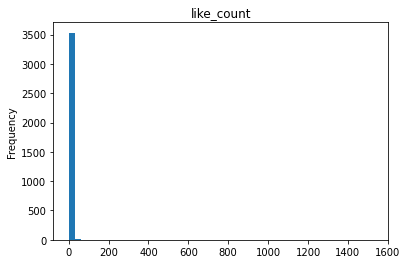

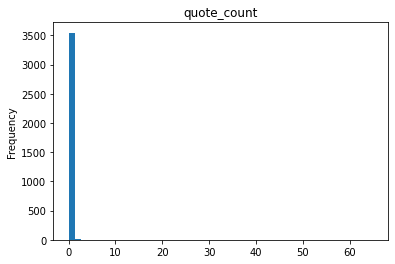

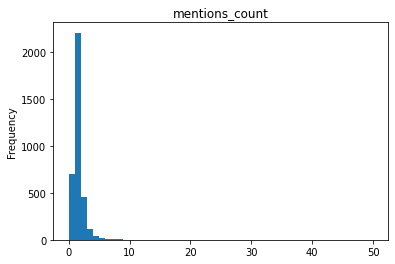

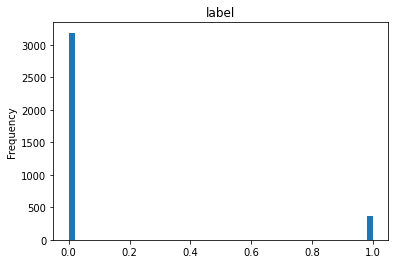

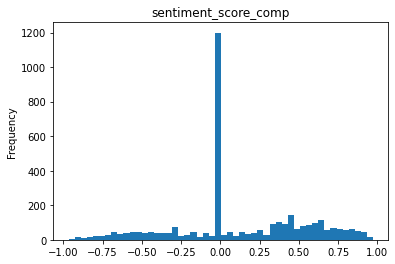

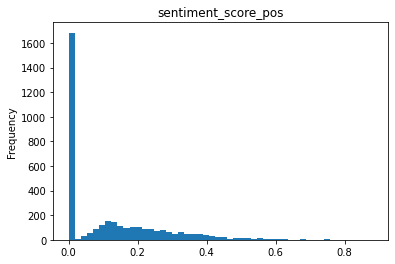

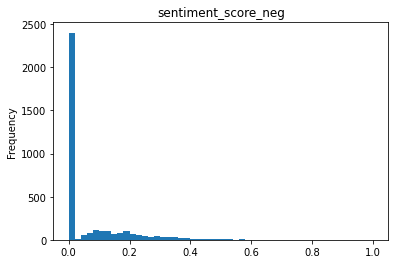

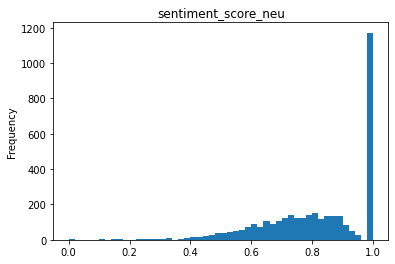

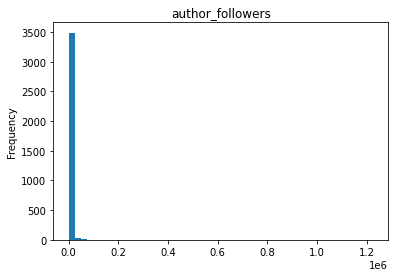

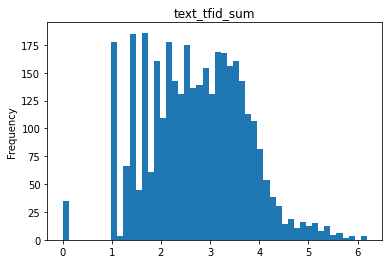

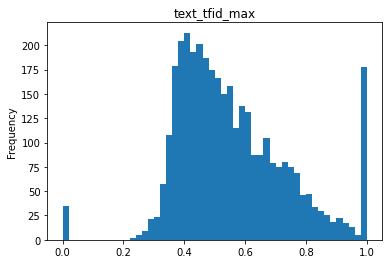

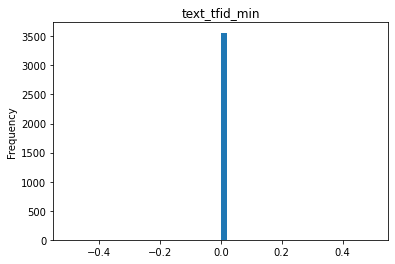

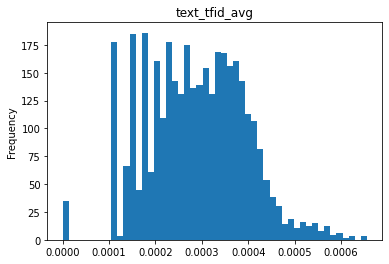

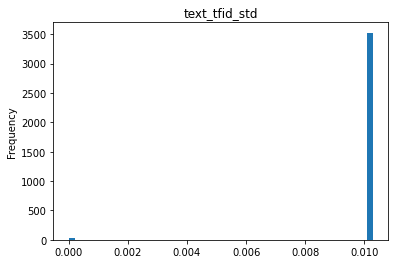

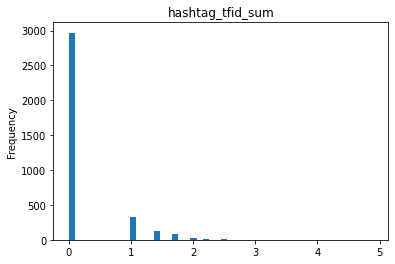

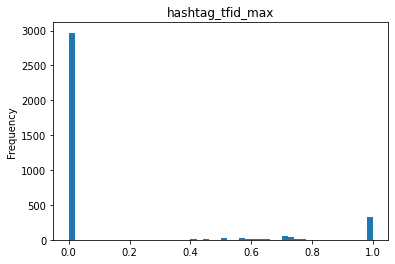

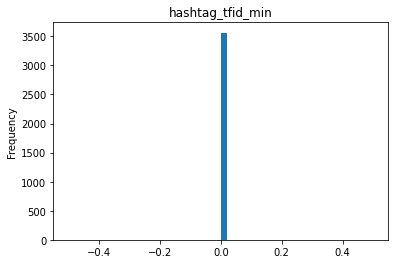

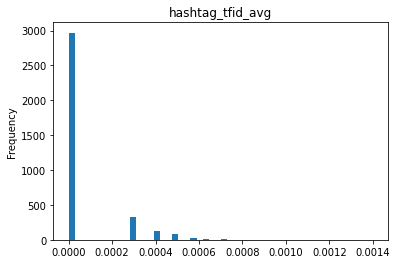

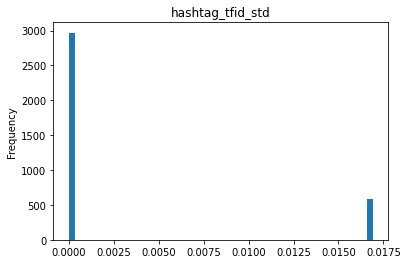

In [ ]:
# ----- Compute the freqencies of the features ----- ##
for column_name in non_norm.columns:
  plotData(non_norm[column_name], column_name)


In [ ]:
## ----- Compute features stats ----- ##
result_dict = {}
for column_name in non_norm.columns:
  avg_name = column_name + "_avg"
  std_name = column_name + "_std"
  result_dict[avg_name] = non_norm[column_name].mean()
  result_dict[std_name] = non_norm[column_name].std()

In [ ]:
## ----- Print feature stats ----- ##
feature_stats_df = pd.DataFrame(result_dict, index=[0])
print("-- Full analysis --")
print(feature_stats_df.iloc[0])
print("")

-- Full analysis --
like_count_avg                  2.109489
like_count_std                 32.367906
quote_count_avg                 0.055867
quote_count_std                 1.351659
mentions_count_avg              1.119596
mentions_count_std              1.318762
label_avg                       0.104716
label_std                       0.306231
sentiment_score_comp_avg        0.123338
sentiment_score_comp_std        0.423740
sentiment_score_pos_avg         0.120865
sentiment_score_pos_std         0.149840
sentiment_score_neg_avg         0.064423
sentiment_score_neg_std         0.115719
sentiment_score_neu_avg         0.814701
sentiment_score_neu_std         0.174693
author_followers_avg         3408.703537
author_followers_std        28093.879403
text_tfid_sum_avg               2.707399
text_tfid_sum_std               1.005001
text_tfid_max_avg               0.557748
text_tfid_max_std               0.183482
text_tfid_min_avg               0.000000
text_tfid_min_std               0.000

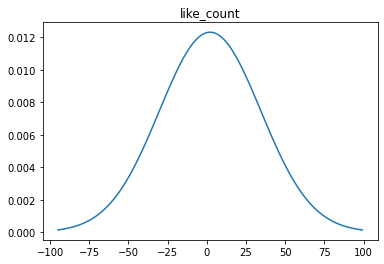

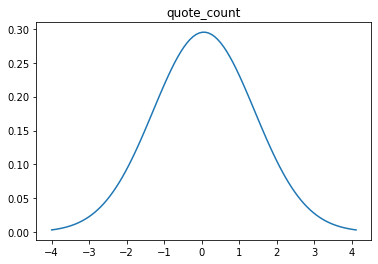

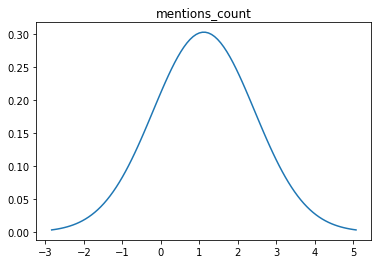

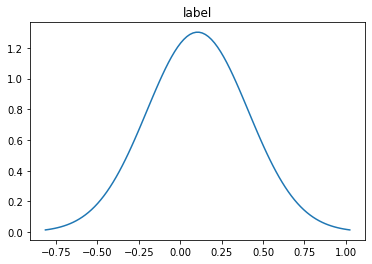

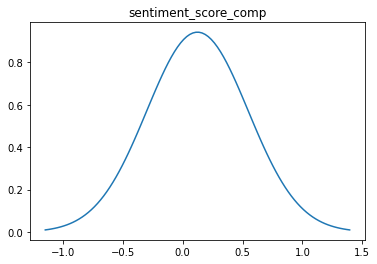

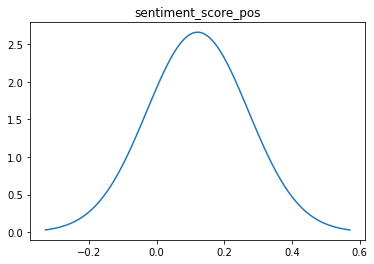

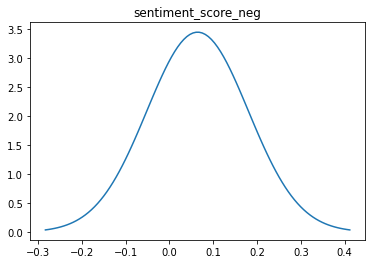

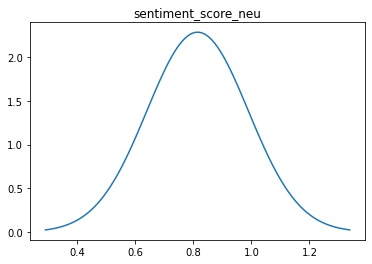

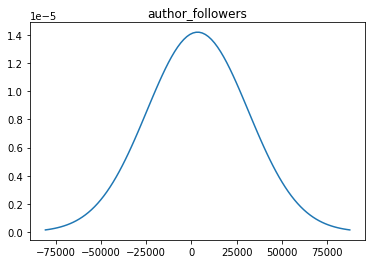

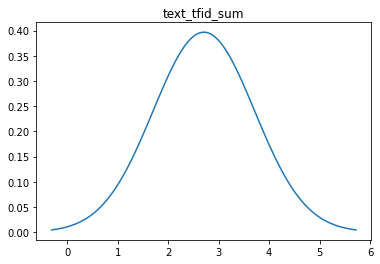

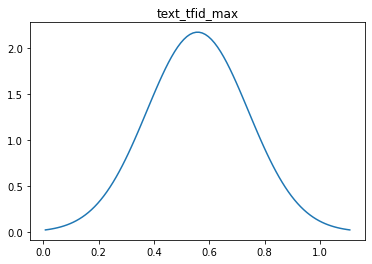

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


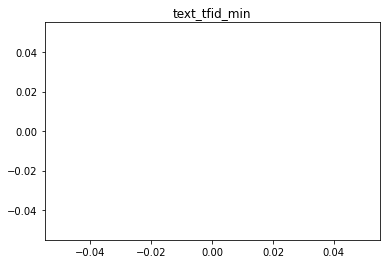

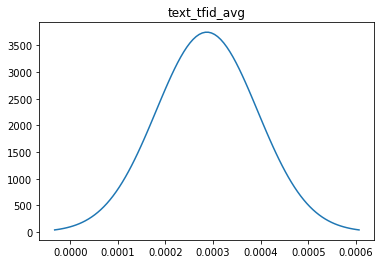

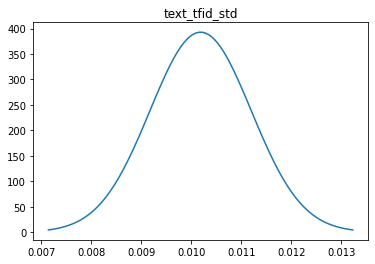

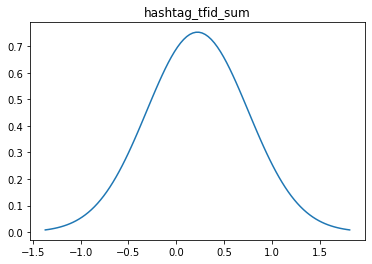

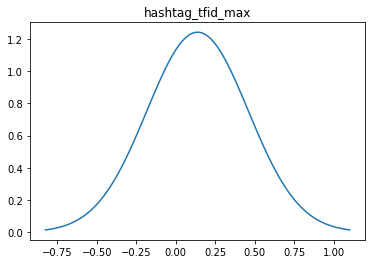

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


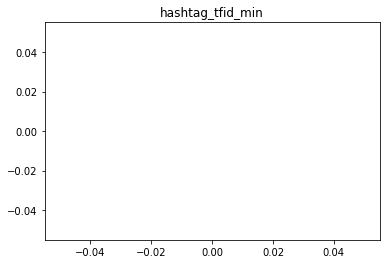

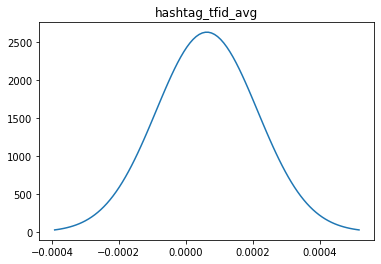

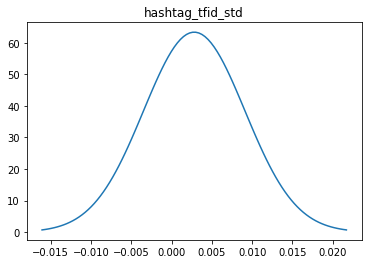

In [ ]:
## ----- Plots the data assuming normal distribution ----- ##
for column_name in non_norm.columns:
  avg_name = column_name + "_avg"
  std_name = column_name + "_std"
  plotNormalDistribution(result_dict[avg_name], result_dict[std_name], column_name)


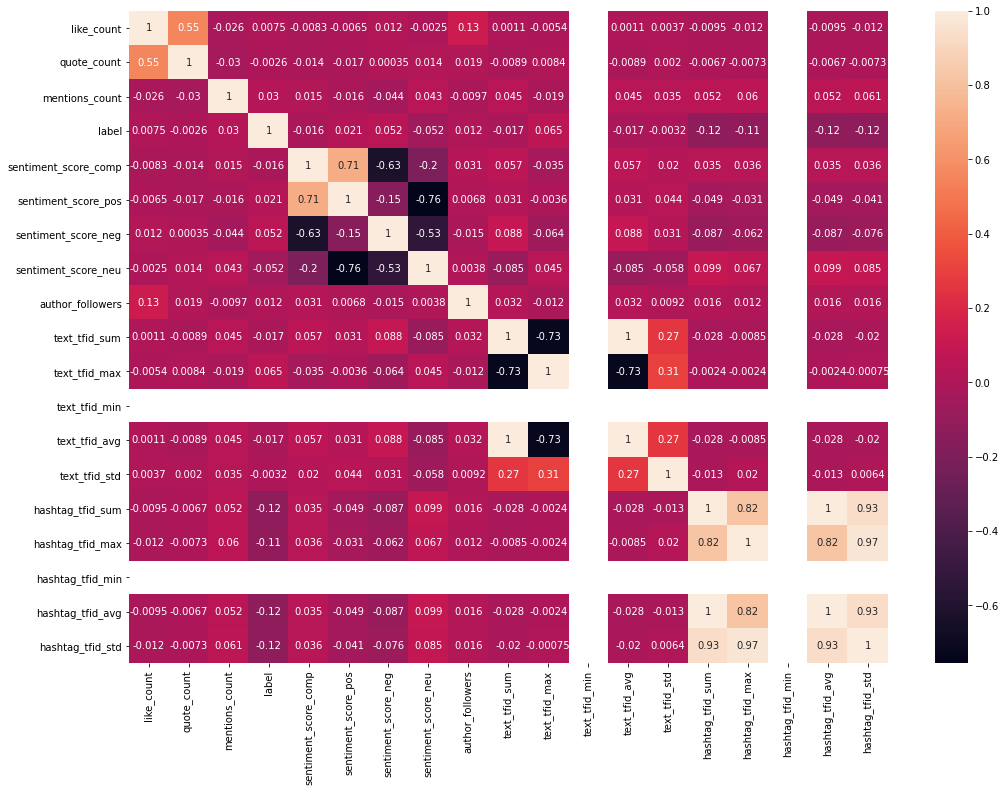

In [ ]:
## ----- Correlation Analysis ----- ##
corrMatrix = non_norm.corr()
plt.figure(figsize=(17, 12))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
def balance_data(x_data, y_data):
  smote = SMOTE()

  # fit predictor and target variable
  x_smote, y_smote = smote.fit_resample(x_data, y_data)
  return (pd.DataFrame(x_smote, columns=x_data.columns), y_smote)

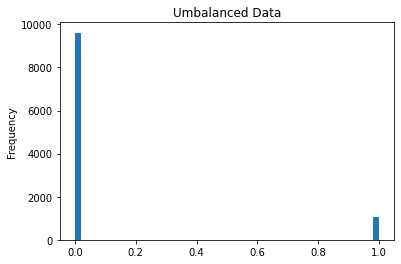

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


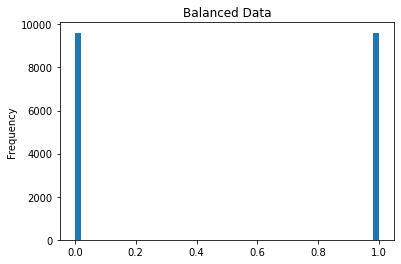

In [ ]:
## ----- Is the data balanced? ----- ##
plotData(y_train, "Umbalanced Data")
X_train_nd_balanced, y_train_nd_balanced = balance_data(X_train_nd, y_train_nd)
X_train_balanced, y_train_balanced = balance_data(X_train, y_train)
plotData(y_train_nd_balanced, "Balanced Data")

## Models and Evaluation

#### Experimental Setup
We have used the following methics to evaluate the model
- F1
- Precision
- Accuracy
- Recall

Since our data is imbalanced, it is important to not rely only on accuracy and precision. Therefore, we have used other metrics such as recall and F1. If we have a low recall and low F1, but high accuracy, for example, that might be an indication that the model is biased towards the majority class <br>
We have split the data 60% - 20% - 20% to the train - dev - test splits (in that order). That allowed us to still have a lot of data for training, but also have a reliable amount of data to test and evaluate the hyperparameters of the models. 

#### Baselines
We have used a simple logistic regression model as a baseline. This is the most simple/classic model for classification, and therefore would be interesting to see how other more complicated models and modern architectures perform in comparison to that. Additionally, we calculate the majority vote as a baseline.

#### Methods
We have used the following methods:
1. <u> Majority Vote </u> - a baseline for classification
2. <u>Logistic regression</u> - a baseline for classification
3. <u>SVM</u> - model commonly used for classification that seemed to perform well on our task
4. <u>Simple feed forward neural network</u> - more modern architecture that could be useful for analyzing text data
5. <u>Bi-LSTM</u> - a method that would be interesting to compare with the simple feed forward neural network, and that performs very well on "understanding" textual data and predicting the next value in a sequence

The logistic regression and SVM were the easiest to implement. The Simple FF was harder, since it was very sensitive to hyperparameters. Moreover, Bi-LSTM was also a challenge, since it was quick to overfit to the data

In [ ]:
def calculate_scores(model, xtest, ytest):
  pred = model.predict(xtest)
  f1 = f1_score(ytest, pred)
  precision = precision_score(ytest, pred)
  recall = recall_score(ytest, pred, average="binary")
  accuracy = accuracy_score(ytest, pred)
  scores = {"f1": f1, "precision":precision, "recall": recall, "accuracy": accuracy}
  scores_df = pd.DataFrame(scores, index=[0])
  print(scores_df)


In [ ]:
def modelExplainability(model, xtrain):
  explainer = lime.lime_tabular.LimeTabularExplainer(xtrain.values,feature_names=xtrain.columns.values.tolist(), class_names=[0, 1])
  predict_fn = lambda x: model.predict_proba(x).astype(float)
  exp = explainer.explain_instance(X_test.values[0], predict_fn, num_features=6)
  exp.show_in_notebook(show_all=False)

In [ ]:
def hyperparameter_train_logistic(param_grid, xval, yval, xtrain, ytrain):
  rand = randint(0, 10)
  model = LogisticRegression(random_state=0)
  model_hyperparameter = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=rand, scoring="f1")
  model_hyperparameter.fit(xval, yval)
  optimal_parameters = model_hyperparameter.best_params_
  print("Optimal parameters: " + str(optimal_parameters))
  result_model = LogisticRegression(penalty=optimal_parameters["penalty"], max_iter=optimal_parameters["max_iter"], C=optimal_parameters["C"])
  result_model.fit(xtrain, ytrain)
  return result_model

In [ ]:
def hyperparameter_train_svm(param_grid, xval, yval, xtrain, ytrain):
  rand = randint(0, 10)
  model = SVC(random_state=0)
  model_hyperparameter = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=rand, scoring="f1")
  model_hyperparameter.fit(xval, yval)
  optimal_parameters = model_hyperparameter.best_params_
  print("Optimal parameters: " + str(optimal_parameters))
  result_model = SVC(kernel=optimal_parameters["kernel"], C=optimal_parameters["C"], probability=True)
  result_model.fit(xtrain, ytrain)
  return result_model

In [ ]:
def save_model(model, name):
  pickle.dump(model, open(name, 'wb'))

In [ ]:
def load_model(name):
  loaded_model = pickle.load(open(name, 'rb'))
  return loaded_model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.model_selection import RandomizedSearchCV
from random import randint

#### Majority Vote
We caculate our evaluation metrics, predicting all examples to be the majority class - 0. This achieves the following results:
```
Accuracy": 0.8941666666666667
Precision": 0.0
Recall": 0.0
F1-score": 0.0
```

As we can see, as a result of our unbalanced dataset, the majority vote model acheives high accuracy by 0.0 precision, recall, and F1.

#### Logistic Regression
We have tested several logistic regression models. 
We have chosen the hyperparameters that maximized the F1 score. <br>
Here are the parameters we have tested:
- Penalties: L1, L2, elacticnet
- Max Iterations: 100, 1000, 10000
- C: 1, 0.9, 0.5

Here are the results hyperparamter results: <br>
- Balanced Data: {'penalty': 'l2', 'max_iter': 1000, 'C': 1} <br>
- Unbalanced Data: {'penalty': 'l2', 'max_iter': 1000, 'C': 1} <br>
- Balanced Numeric Data: {'penalty': 'l2', 'max_iter': 100, 'C': 1} <br>
- Unbalanced Numeric Data: {'penalty': 'l2', 'max_iter': 100, 'C': 1}

Moreover, here are the metrics of the model: <br>
- Balanced Data:
         f1    | precision |  recall   |  accuracy
      0.309006 |  0.217486 | 0.533512  |  0.75014

- Unbalanced Data:
         f1   | precision |  recall  | accuracy
       0.1893 |  0.40708  | 0.123324 | 0.889388

- Balanced Numeric Data
          f1     |  precision |  recall   | accuracy
       0.233145  |  0.139148  |  0.718499 | 0.505053

- Log Unbalanced Numeric Data
        f1   | precision  |  recall |  accuracy
       0.0   |    0.0     |    0.0  |  0.894722


As we can see, we have obtained the best results with the full balanced data. For the unbalanced data, we have a relatively high accuracy, but low recall and F1, which could indicate we are biased towards the majority class as expected. Therefore, balancing the data was crucial to obtaining better results. <br> 
Moreover, including word embeddings with BERT gave us more information about the text that was useful in fitting a better model. 


In [ ]:
## ----- Run this cell if you already have the models and want to load them ----- ##
# Replace with the path for your logistic regressoin model trained on balanced data
log_balanced_name = ""

# Replace with the path for your logistic regressoin model trained on unbalanced data
log_unbalanced_name = ""

# Replace with the path for your logistic regressoin model trained on balanced numeric data
log_balanced_nd_name = ""

# Replace with the path for your logistic regressoin model trained on unbalanced numeric data
log_unbalanced_nd_name = ""

In [ ]:
## ----- Run this cell if you already have the models and want to load them ----- ##
log_balanced = load_model(log_balanced_name)
log_unbalanced = load_model(log_unbalanced_name)
log_balanced_nd = load_model(log_balanced_nd_name)
log_unbalanced_nd = load_model(log_unbalanced_nd_name)

In [ ]:
## ---- Run this cell if you want to run the models again ----- ##
param_grid_log = {"penalty": ["l1", "l2", "elasticnet"], "max_iter": [100, 1000, 10000], "C": [1, 0.9, 0.5]}
log_balanced = hyperparameter_train_logistic(param_grid_log, X_dev ,y_dev, X_train_balanced, y_train_balanced)
log_unbalanced = hyperparameter_train_logistic(param_grid_log, X_dev ,y_dev, X_train, y_train)
log_balanced_nd = hyperparameter_train_logistic(param_grid_log, X_dev_nd ,y_dev_nd, X_train_nd_balanced, y_train_nd_balanced)
log_unbalanced_nd = hyperparameter_train_logistic(param_grid_log, X_dev_nd ,y_dev_nd, X_train_nd, y_train_nd)

Optimal parameters: {'penalty': 'l2', 'max_iter': 1000, 'C': 1}
Optimal parameters: {'penalty': 'l2', 'max_iter': 1000, 'C': 1}
Optimal parameters: {'penalty': 'l2', 'max_iter': 100, 'C': 1}
Optimal parameters: {'penalty': 'l2', 'max_iter': 100, 'C': 1}


In [ ]:
## ----- Run this cell to save the models you have run in the previous cell ----- ##
save_model(log_balanced, "log_balanced.sav")
save_model(log_unbalanced, "log_unbalanced.sav")
save_model(log_balanced_nd, "log_balanced_nd.sav")
save_model(log_unbalanced_nd, "log_unbalanced_nd.sav")

In [ ]:
print("\n Log Balanced")
calculate_scores(log_balanced, X_test, y_test)

print("\n Log Unbalanced")
calculate_scores(log_unbalanced, X_test, y_test)

print("\n Log Balanced Numeric Data")
calculate_scores(log_balanced_nd, X_test_nd, y_test_nd)

print("\n Log Unbalanced Numeric Data")
calculate_scores(log_unbalanced_nd, X_test_nd, y_test_nd)

Log Balanced
         f1  precision    recall  accuracy
0  0.309006   0.217486  0.533512   0.75014
Log Unbalanced
       f1  precision    recall  accuracy
0  0.1893    0.40708  0.123324  0.889388
Log Balanced Numeric Data
         f1  precision    recall  accuracy
0  0.233145   0.139148  0.718499  0.505053
Log Unbalanced Numeric Data
    f1  precision  recall  accuracy
0  0.0        0.0     0.0  0.894722


In [ ]:
modelExplainability(log_balanced, X_train_balanced)

#### SVM
We have tested several SVM models. We have chosen the hyperparameters that maximized the F1 score. 
Here are the parameters we have tested: <br>
- Kernel: linear, rbf, sigmoid <br>
- C: 1, 0.5, 0.025 <br>
We have tested those methods in the balanced data. Here are the results:



In [ ]:
## ----- Run this cell if you already have the models and want to load them ----- ##
# Replace with the path for your svm model trained on balanced data
svm_name = ""

# Replace with the path for your svm model trained on balanced numeric data
svm_nd_name = ""

In [ ]:
## ----- Run this cell if you already have the models and want to load them ----- ##
svm = load_model(svm_name)
svm_nd = load_model(svm_nd_name)

In [ ]:
## ---- Run this cell if you want to run the models again ----- ##
param_grid_svm = {"kernel": ["linear", "rbf", "sigmoid"], "C": [1, 0.5, 0.025], "probability":[True]}
svm = hyperparameter_train_svm(param_grid_svm, X_dev, y_dev, X_train_balanced, y_train_balanced)
save_model(svm, "svm.sav")
print("Calculating Scores")
calculate_scores(svm, X_test, y_test)
print("Explainability")
modelExplainability(svm, X_train)

In [ ]:
svm = SVC(kernel="linear", C=0.025, probability=True)
print("Training")
svm.fit(X_train, y_train)
print("Calculating Scores")
calculate_scores(svm, X_test, y_test)
print("Explainability")
modelExplainability(svm, X_train)

         f1  precision    recall  accuracy
0  0.316503   0.220126  0.563003  0.745368


### Feed Forward NN
We used the following hyperparameters

- Learning rate: 0.001
- Hidden dim: 128
- Batch size: 36
- Train steps: 600

The hyperparameters were tuned on the dev set.

The code for this model does not fit in a notebook, please reference our project [repo](https://github.com/isabelcachola/ML-Fall2020-Final-Project).

Train on unbalanced data, we acheive the following results on the test set:
```
Accuracy: 0.8891666666666667
Precision: 0.4375,
Recall: 0.16535433070866143,
F1-score: 0.24000000000000002
```

Trained on balanced data, we acheive the following results:
```
Accuracy: 0.8015160022459292
Precision: 0.25936599423631124
Recall: 0.48257372654155495
F1-score: 0.33739456419868785
```

We can see from the results that training on balanced data leads to significant improvements on the test set.

### BiLSTM
We used the following hyperparameters

- Learning rate: 0.001
- Optimizer: Adam
- Max seq len: 25
- Batch size: 36
- Epochs: 5
- Dropout rate: 0.3
- Hidden dim: 128

The hyperparameters were tuned on the dev set. The embeddings were randomly initialized. 

The code for this model does not fit in a notebook, please reference our project [repo](https://github.com/isabelcachola/ML-Fall2020-Final-Project).

Train on unbalanced data, we acheive the following results on the test set:
```
Accuracy: 0.8733333333333333
Precision: 0.34439834024896265
Recall: 0.2178477690288714
F1-score: 0.26688102893890675
```

Due to the balancing method, we were unable to train the Bi-LSTM on balanced data.

We can see from the results that the Bi-LSTM performs worse than the Simple FF model. We also found that the Bi-LSTM quickly overfit to the data, with the validation accuracy decreasing after 1 epoch. 

## Discussion


We think that one of the most important concepts that we learned from the breakouts and lectures was dataset creation and exploration. Since the data availability was very important for our project, the skills that we learned during homework 1 helped us to create a dataset using several sources (Twitter API and CLSP grid).  We also tried different classification models learned during the class such as logistics regression, SVMs and Neural Networks.  Since we already had experience with Logistic regression, SVMs and NN, it was much easier for us to implement. However, NN were a little harder to train due to hyperparameters sensitivity. We also used knowledge from class on how to select the right metrics for our models. Since we had a very unbalanced dataset, we knew that accuracy may not be the best choice and we instead chose f1, precision and recall. 

One of the surprising parts of this project was how well a simple logistic regression model worked compared to neural nets and that Bi-LSTM performs worse than the NN because it quickly overfits the data. 
The lesson that we would like to take from this project is the importance of defining the problem first doing more extensive research about similar works. Also, we think that when working on a novel task, it is also important to start exploring data availability before finalizing the task.

The most important feedback that we received during our presentation was to focus more on task definition and real-world application of our model. This is a crucial step for any project and specifically for the novel space that we attempted to explore. By exploring the real-world application, we gained a much better understanding of our model and what benefits it can bring to the ML world. One of the real-work applications that we found interesting is to use our model as a potentially novel approach to label unlabeled tweets as controversial or not.

If we had two more weeks to work on the project, we would try to find the data that can help us to prove our hypothesis better and conduct an analysis of the relationship between user clusters on Twitter and the number of negative replies. The hypothesis is that users who have more cluster overlap receive more negative replies

